In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

## effective number of frames

comparison between arithmetic and geometric average

0.7534167639606298
-3.340927798261472
0.2972069914096403 0.4707553418585168
0.056077639989615874 0.03540409462135373


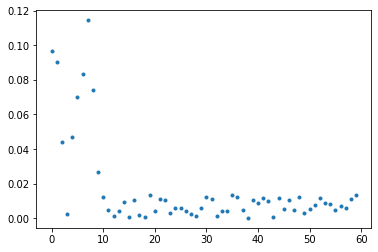

In [2]:
# p = np.random.dirichlet(np.ones(1000)) # , size=10)

# p = np.random.rand(10)
p = np.concatenate([np.random.rand(10), np.random.rand(50)*0.1])
p = p/np.sum(p)
p0 = np.ones(len(p))/len(p)

arith = np.sum(p**2)
geom = np.exp(np.sum(p*np.log(p)))

rel_n_frames_a = 1/np.sum(p**2/p0)
rel_n_frames_g = np.exp(-np.sum(p*np.log(p/p0)))

dkl = np.sum(p*np.log(p/p0))
print(dkl)

s = np.sum(p*np.log(p))
print(s)

plt.plot(p, '.')
print(rel_n_frames_a, rel_n_frames_g)
print(arith, geom)

the geometric average seems to be "more accurate"

- question: which is the effect of a dimensionality reduction (based on x, not on weights), namely, clustering? does the effective n. of frames increase or decrease?

In [3]:
# select_frames = [i for i in range(len(p)) if np.mod(i, 2) == 0]
select_frames = [0, 1, 2] # + [i for i in range(10, 20)]


q = np.array([np.sum(p[select_frames]), 1 - np.sum(p[select_frames])])
q0 = np.array([np.sum(p0[select_frames]), 1 - np.sum(p0[select_frames])])

arith = np.sum(q**2)
geom = np.exp(np.sum(q*np.log(q)))

rel_n_frames_a = 1/np.sum(q**2/q0)
rel_n_frames_g = np.exp(-np.sum(q*np.log(q/q0)))

dkl = np.sum(q*np.log(q/q0))
print(dkl)

s = np.sum(q*np.log(q))
print(s)

print(rel_n_frames_a, rel_n_frames_g)
print(arith, geom)

0.19065815080054918
-0.5402616027461195
0.5923079253091359 0.8264150491918831
0.6449190161887282 0.5825958237696124


- max of the KL divergence on a finite sampling

/tmp/ipykernel_21795/4224261692.py:7: RuntimeWarning: divide by zero encountered in log
  dkl = x*np.log(x/x0[0]) + (1-x)*np.log((1-x)/(1-x0[0]))
/tmp/ipykernel_21795/4224261692.py:7: RuntimeWarning: invalid value encountered in multiply
  dkl = x*np.log(x/x0[0]) + (1-x)*np.log((1-x)/(1-x0[0]))


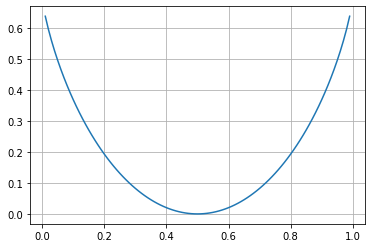

In [12]:
# 2 frames

x = np.arange(0, 1, 0.01)

x0 = [0.5]

dkl = x*np.log(x/x0[0]) + (1-x)*np.log((1-x)/(1-x0[0]))

plt.plot(x, dkl, '-')
plt.grid()

In [14]:
np.log(2)

0.6931471805599453

in case of $P_0$ uniform with $N$ total frames, the furthest distribution from $P_0$ is the one with only one frame non-zero, which has $D_{KL}[P|P_0] = \log N$